<a href="https://colab.research.google.com/github/kevin-persaud-davis/Full-Stack-Deep-Learning/blob/main/Deep_Learning_Fundamentals_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

#This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/DL/DL bootcamp')
!pwd

/content/drive/MyDrive/DL/DL bootcamp


In [ ]:
!python --version

Python 3.6.9


In [ ]:
!pip list | grep tensor

tensorboard                   2.4.1          
tensorboard-plugin-wit        1.8.0          
tensorboardcolab              0.0.22         
tensorflow                    2.4.1          
tensorflow-addons             0.8.3          
tensorflow-datasets           4.0.1          
tensorflow-estimator          2.4.0          
tensorflow-gcs-config         2.4.0          
tensorflow-hub                0.11.0         
tensorflow-metadata           0.27.0         
tensorflow-privacy            0.2.2          
tensorflow-probability        0.12.1         


In [ ]:
!pip list | grep torch

torch                         1.7.0+cu101    
torchsummary                  1.5.1          
torchtext                     0.3.1          
torchvision                   0.8.1+cu101    


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
import numpy as np 

X = np.zeros((3,2))
X

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
X.shape, X.dtype

((3, 2), dtype('float64'))

In [ ]:
X[0, :] = 1
X

array([[1., 1.],
       [0., 0.],
       [0., 0.]])

In [ ]:
X[:, 0] = 2
X

array([[2., 1.],
       [2., 0.],
       [2., 0.]])

In [ ]:
X = np.array([
              [1,2],
              [3,4],
              [5,6]
              ])
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
x = np.array([10,20])
print(x)
print(X.shape, x.shape)
X + x

[10 20]
(3, 2) (2,)


array([[11, 22],
       [13, 24],
       [15, 26]])

In [ ]:
X * x

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

In [ ]:
x = np.array([[10,20],]).T
result = X @ x
result

array([[ 50],
       [110],
       [170]])

In [ ]:
X = np.random.rand(3, 2)
X

array([[0.14830249, 0.82900887],
       [0.28528522, 0.9912654 ],
       [0.41390829, 0.13107307]])

In [ ]:
X > 0.5

array([[False,  True],
       [False,  True],
       [False, False]])

In [ ]:
X[X > 0.5] = 1
X

array([[0.14830249, 1.        ],
       [0.28528522, 1.        ],
       [0.41390829, 0.13107307]])

In [ ]:
import matplotlib.pyplot as plt
plt.set_cmap('gray')

<Figure size 432x288 with 0 Axes>

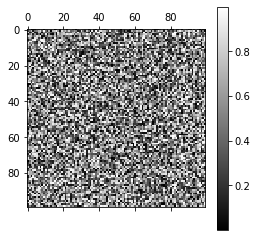

In [ ]:
X = np.random.rand(100,100)
plt.matshow(X)
plt.colorbar()

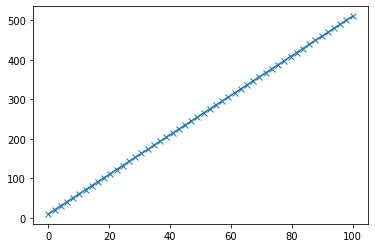

In [ ]:
x = np.linspace(0, 100)
y = x * 5 + 10
# y = x * w + b

plt.plot(x, y, 'x-')

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


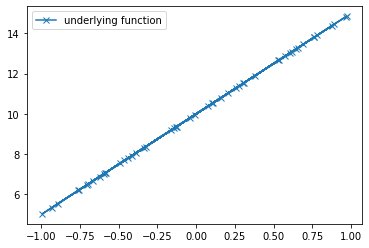

In [ ]:
n = 50

d = 1
x = np.random.uniform(-1,1,(n,d))

weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()


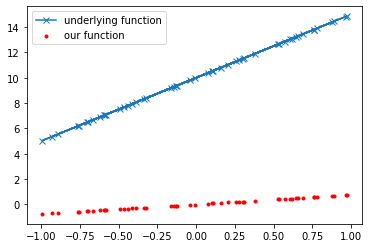

In [ ]:
    
class Linear:
    def __init__(self, input_dim, num_hidden=1):
        # The initialization is important to properly deal with different
        # input sizes (otherwise gradients quickly go to 0).
        self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
        self.bias = np.zeros(1)
    def __call__(self, x):
        return x @ self.weights + self.bias

linear = Linear(d)
y_pred = linear(x)
plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_pred, color='r', marker='.', label='our function')
plt.legend()

In [ ]:
# How wrong are these initial predictions, exactly?
# It's up to us, and our definition is called the loss function.
# Let's use Mean Squared Error (MSE) as our loss function.

class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_true - y_pred) ** 2).mean()

loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 107.349781879032


In [ ]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_pred - y_true) ** 2).mean()
    
    def backward(self):
        n = self.y_true.shape[0]
        self.gradient = 2. * (self.y_pred - self.y_true) / n
        # print('MSE backward', self.y_pred.shape, self.y_true.sahpe, self.gradient.shape)
        return self.gradient

class Linear:
    def __init__(self, input_dim: int, num_hidden: int = 1):
        self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
        self.bias = np.zeros((1))
        # bound = np.sqrt(6 / (input_dim + num_hidden))
        # self.weights = np.random.uniform(-bound, bound, size=(input_dim, num_hidden))
        # self.bias = np.random.uniform(-bound, bound, size=(1,))
    
    def __call__(self, x):
        self.x = x
        output = x @ self.weights + self.bias
        # print('Linear forward', x.shape, self.weights.shape, output.shape)
        return output

        # y = w*x + b
        # dy/dx = w
        # dy/dw = x
        # dy/db = 1

    def backward(self, gradient):
        # print('Linear backward', gradient.shape, self.x.shape, self.weights.shape, self.bias, shape)
        self.weights_gradient = self.x.T @ gradient
        self.bias_gradient = gradient.sum()
        self.x_gradient = gradient @ self.weights.T 
        return self.x_gradient

    def update(self, lr):
        self.weights = self.weights - lr * self.weights_gradient
        self.bias = self.bias - lr * self.bias_gradient


In [ ]:
# Take one step forward and one step backward to make sure nothing breaks, and that the loss decreases.
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_true))

118.61775516216272
79.440453107232


Epoch 0, loss 106.70436942793907
Epoch 5, loss 13.344529051516353
Epoch 10, loss 2.384892453343204
Epoch 15, loss 0.7347378606704014
Epoch 20, loss 0.319381500725661
Epoch 25, loss 0.1551019253692209
Epoch 30, loss 0.07733948962783153
Epoch 35, loss 0.0387881060256914


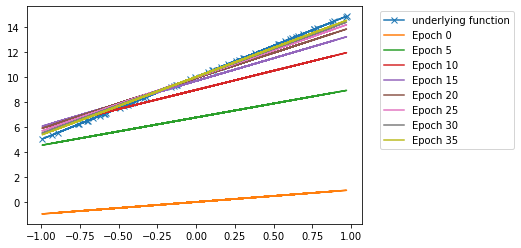

In [ ]:
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
linear = Linear(d)

num_epochs = 40
lr = 0.1

for epoch in range(num_epochs):
    y_pred = linear(x)
    loss_value = loss(y_pred, y_true)

    if epoch % 5 == 0:
        print(f'Epoch {epoch}, loss {loss_value}')
        plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')

    gradient_from_loss = loss.backward()
    linear.backward(gradient_from_loss)
    linear.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


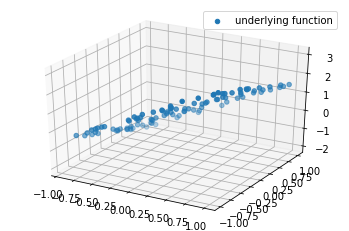

In [ ]:
n = 100
d = 2
x = np.random.uniform(-1, 1, (n,d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + b
# y = w@x + b

weights_true = np.array([[2,-1], ]).T
bias_true = np.array([0.5])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x,y, y_pred=None):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
    if y_pred is not None:
        ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
    plt.legend()

plot_3d(x, y_true)

2.2471894056497392


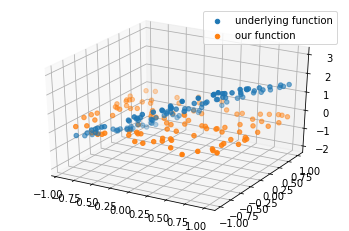

In [ ]:
loss = MSE()
linear = Linear(2)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoch 0, loss 2.2471894056497392
Epoch 1, loss 1.8531573240031387
Epoch 2, loss 1.5459604750425473
Epoch 3, loss 1.3017748582241955
Epoch 4, loss 1.104332317255713
Epoch 5, loss 0.9423412352402223
Epoch 6, loss 0.8078167769063118
Epoch 7, loss 0.6949955649408676
Epoch 8, loss 0.5996265370473506
Epoch 9, loss 0.5185044890058133
Epoch 10, loss 0.44916064886275087
Epoch 11, loss 0.38965525351532726
Epoch 12, loss 0.3384367156185983
Epoch 13, loss 0.29424454244967213
Epoch 14, loss 0.25604123522981004
Epoch 15, loss 0.22296357918777437
Epoch 16, loss 0.1942870685663588
Epoch 17, loss 0.16939936034683334
Epoch 18, loss 0.14778004027283023
Epoch 19, loss 0.1289848865851541


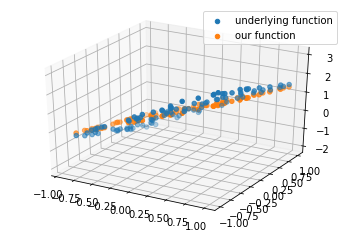

In [ ]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
    for epoch in range(num_epochs):
        y_pred = model(x)
        loss_value = loss(y_pred, y)
        print(f'Epoch {epoch}, loss {loss_value}')
        gradient_from_loss = loss.backward()
        model.backward(gradient_from_loss)
        model.update(lr)

fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, linear(x))

x: (200, 2), weights: (2, 1), bias (1,), y: (200, 1)


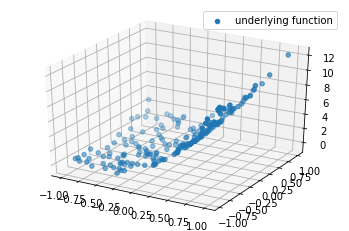

In [ ]:
 n = 200
 d = 2
 x = np.random.uniform(-1, 1, (n,d))

 weights_true = np.array([[5,1], ]).T
 bias_true = np.array([1])

 y_true = (x**2) @ weights_true + x @ weights_true + bias_true
 print(f'x: {x.shape}, weights: {weights_true.shape}, bias {bias_true.shape}, y: {y_true.shape}')
 
 plot_3d(x, y_true)

Epoch 0, loss 20.299587515689876
Epoch 1, loss 16.248678523397516
Epoch 2, loss 13.359120194013682
Epoch 3, loss 11.248072808056266
Epoch 4, loss 9.666445487973645
Epoch 5, loss 8.451168612650203
Epoch 6, loss 7.494623898232032
Epoch 7, loss 6.725048389484141
Epoch 8, loss 6.093959233660705
Epoch 9, loss 5.568071852366408
Epoch 10, loss 5.124095445519967
Epoch 11, loss 4.745372292483286
Epoch 12, loss 4.419699702823565
Epoch 13, loss 4.137911541098367
Epoch 14, loss 3.8929484702464627
Epoch 15, loss 3.679243401436661
Epoch 16, loss 3.4923109018913876
Epoch 17, loss 3.3284691498177894
Epoch 18, loss 3.184648524946839
Epoch 19, loss 3.0582572539844928
Epoch 20, loss 2.9470849971212463
Epoch 21, loss 2.8492319771626198
Epoch 22, loss 2.7630555674407127
Epoch 23, loss 2.6871290320392847
Epoch 24, loss 2.6202089042989916
Epoch 25, loss 2.5612086503488007
Epoch 26, loss 2.509177019593453
Epoch 27, loss 2.4632799783896573
Epoch 28, loss 2.422785449262258
Epoch 29, loss 2.3870502953710315
Epoc

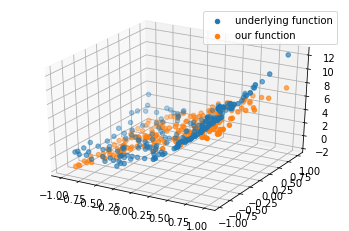

In [ ]:
# We can train just fine, but the final loss will remain high, as our linear function is incapable
# of representing the data.

loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, linear(x))

In [ ]:
# In order to learn non-linear functions, we need non-linearities in our model

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
        # import pdb; pdb.set_trace()  # By the way, this is how you can debug
        self.input_gradient = (self.input_ > 0) * output_gradient
        return self.input_gradient

relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))


[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


21.00718571748098


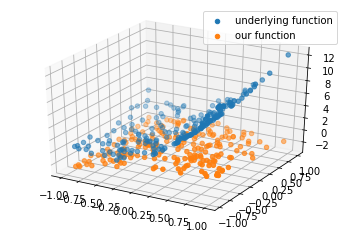

In [ ]:
# Train new non-linear model

class Model:
    def __init__(self, input_dim, num_hidden):
        self.linear1 = Linear(input_dim, num_hidden)
        self.relu = Relu()
        self.linear2 = Linear(num_hidden, 1)

    def __call__(self, x):
        l1 = self.linear1(x)
        r = self.relu(l1)
        l2 = self.linear2(r)
        return l2

    def backward(self, output_gradient):
        linear2_gradient = self.linear2.backward(output_gradient)
        relu_gradient = self.relu.backward(linear2_gradient)
        linear1_gradient = self.linear1.backward(relu_gradient)
        # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
        # import pdb; pdb.set_trace()
        return linear1_gradient

    def update(self, lr):
        self.linear2.update(lr)
        self.linear1.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

In [ ]:
# Test just one forward and backward step

In [ ]:
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

18.43898920401942
9.089608966641608


Epoch 0, loss 9.089608966641608
Epoch 1, loss 5.209678505179088
Epoch 2, loss 3.6441869188139937
Epoch 3, loss 2.631903077155577
Epoch 4, loss 1.871830652535684
Epoch 5, loss 1.4264050181107717
Epoch 6, loss 1.1925041643005847
Epoch 7, loss 1.0682567512942014
Epoch 8, loss 0.989100958974167
Epoch 9, loss 0.9262822207044485
Epoch 10, loss 0.8701929059585987
Epoch 11, loss 0.8177978193468312
Epoch 12, loss 0.767828521638843
Epoch 13, loss 0.7199278849744561
Epoch 14, loss 0.6756009457105594
Epoch 15, loss 0.6338479003774885
Epoch 16, loss 0.5953541612688066
Epoch 17, loss 0.5591108446425114
Epoch 18, loss 0.526021979822024
Epoch 19, loss 0.4949159897444034
Epoch 20, loss 0.4667319105825644
Epoch 21, loss 0.4407425053618779
Epoch 22, loss 0.4177695081060382
Epoch 23, loss 0.3969437626699694
Epoch 24, loss 0.37676680613429236
Epoch 25, loss 0.35832718030457655
Epoch 26, loss 0.34140691358547487
Epoch 27, loss 0.32604545834866583
Epoch 28, loss 0.31218292169738765
Epoch 29, loss 0.299560215

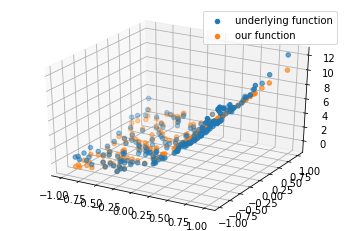

In [ ]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=30)
plot_3d(x, y_true, model(x))

tensor(16.8364, grad_fn=<MseLossBackward>)


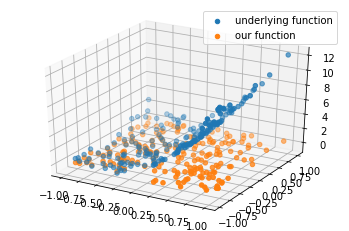

In [ ]:
import torch
import torch.nn as nn 

class TorchModel(nn.Module):
    def __init__(self, input_dim, num_hidden):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, num_hidden)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(num_hidden, 1)

    def forward(self,x):
        l1 = self.linear1(x)
        r = self.relu(l1)
        l2 = self.linear2(r)
        return l2

loss = nn.MSELoss()
model = TorchModel(d,10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

plot_3d(x_tensor, y_true_tensor, model(x_tensor).detach())

In [ ]:
# Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(16.8364, grad_fn=<MseLossBackward>)
tensor(8.6960, grad_fn=<MseLossBackward>)


tensor(8.6960, grad_fn=<MseLossBackward>)
tensor(6.2889, grad_fn=<MseLossBackward>)
tensor(4.7714, grad_fn=<MseLossBackward>)
tensor(3.5785, grad_fn=<MseLossBackward>)
tensor(2.7005, grad_fn=<MseLossBackward>)
tensor(2.0753, grad_fn=<MseLossBackward>)
tensor(1.6356, grad_fn=<MseLossBackward>)
tensor(1.3357, grad_fn=<MseLossBackward>)
tensor(1.1230, grad_fn=<MseLossBackward>)
tensor(0.9735, grad_fn=<MseLossBackward>)
tensor(0.8652, grad_fn=<MseLossBackward>)
tensor(0.7826, grad_fn=<MseLossBackward>)
tensor(0.7173, grad_fn=<MseLossBackward>)
tensor(0.6611, grad_fn=<MseLossBackward>)
tensor(0.6135, grad_fn=<MseLossBackward>)
tensor(0.5726, grad_fn=<MseLossBackward>)
tensor(0.5364, grad_fn=<MseLossBackward>)
tensor(0.5035, grad_fn=<MseLossBackward>)
tensor(0.4738, grad_fn=<MseLossBackward>)
tensor(0.4469, grad_fn=<MseLossBackward>)
tensor(0.4223, grad_fn=<MseLossBackward>)
tensor(0.4000, grad_fn=<MseLossBackward>)
tensor(0.3799, grad_fn=<MseLossBackward>)
tensor(0.3615, grad_fn=<MseLossBac

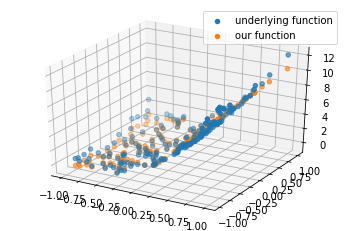

In [ ]:
def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        y_pred_tensor = model(x_tensor)
        loss_value = loss(y_pred_tensor, y_true_tensor)
        print(loss_value)
        loss_value.backward()
        optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=30)
plot_3d(x, y_true, model(x_tensor).detach())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
regression (Dense)           (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
7/7 [==============================] - 0s 2ms/step - loss: 13.0137
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 1.7575
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 0.9294
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 0.4309
Epoch 5/10
7/7 [==============================] - 0s 1ms/step - loss: 1.2655
Epoc

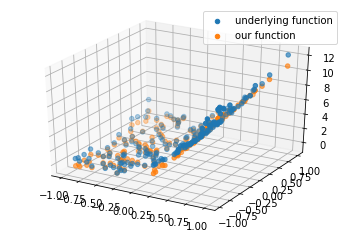

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(2,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x, y_true, epochs=10)

y_pred = model.predict(x)

plot_3d(x, y_true, model(x))